In [1]:
import numpy as np
import pandas as pd
import csv
import copy
import os
import matplotlib.pyplot as plt
import itertools

In [2]:
def open_file(p_1, p_2, p_3, p_4, p_5):
    init_data = []
    total = {}
    path = [p_1, p_2, p_3, p_4, p_5]
    # print(path)
    for p in path:
        with open(p) as csvDataFile:
            csvReader = csv.reader(csvDataFile)
            target = ['0', '0', '0', '0', '0', '0']
            for row in csvReader:
                if (target[1] + target[2]) != (row[1] + row[2]):
                    r_int = int(row[1] + row[2])
                    t_int = int(target[1] + target[2])
                    if (r_int - t_int) != 1:
                        target = row
                        init_data.append(row)
            total[p] = init_data
            init_data = []
    return total

In [3]:
def deal_with(data_in):
    collect = {}
    for x in data_in:
        h = int(x[1])
        d = int(x[4])
        m = int(x[2])
        if h >= 0 and h <= 15:
            h = h + 8
        elif h >= 16 and h <= 23:
            h = h + 8 - 24
            d = d + 1
            if d > 31:
                d = 1
        time = str(d) + ":" + str(h) + ":" + str(m)
        # print(time)
        collect[time] = int(x[0])
    # print(collect)
    return collect

In [4]:
def create_time_list():
    time = []
    d = [30, 31, 1]
    h = []
    for x in range(0, 24):
        h.append(x)
    m = []
    for x in range(0, 60, 5):
        m.append(x)
    # print(h)
    # print(m)
    a = []
    for k in d:
        for x in h:
            for y in m:
                a.append(k)
                a.append(x)
                a.append(y)
                time.append(a)
                a = []
    # print(time)
    return time

In [5]:
def unite(dict_in):
    correct_dict = {}
    temp = copy.copy(time)
    pointer_time = 0
    for pointer_time in range(pointer_time, len(temp)):
        standard = [temp[pointer_time][0], temp[pointer_time][1], temp[pointer_time][2]]
        if temp[pointer_time][0] == 1:
            time_in = "4:" + str(temp[pointer_time][0]) + ":" + str(temp[pointer_time][1]) + ":" + str(temp[pointer_time][2])
        else:
            time_in = "3:" + str(temp[pointer_time][0]) + ":" + str(temp[pointer_time][1]) + ":" + str(temp[pointer_time][2])
        for key in dict_in.copy().keys():
            key2 = key.split(":")
            k = [int(key2[0]), int(key2[1]), int(key2[2])]
            if k[0] == standard[0]:
                if k[1] == standard[1]:
                    if k[2] <= standard[2]:
                        correct_dict[time_in] = dict_in[key]
                        del dict_in[key]
                    else:
                        break
                elif k[1] < standard[1]:
                    correct_dict[time_in] = dict_in[key]
                    del dict_in[key]
                else:
                    break
            elif k[0] < standard[0]:
                correct_dict[time_in] = dict_in[key]
                del dict_in[key]
            elif k[0] == 31 and standard[0] == 1:
                correct_dict[time_in] = dict_in[key]
                del dict_in[key]
            else:
                break
            # print(temp[pointer_time])
            # print(dict_in)
        pointer_time = pointer_time + 1
    # print(correct_dict)
    return correct_dict

In [6]:
def low_high_bound(i_37, i_45, i_46, i_69, i_G5):
    first = [i_37[0], i_45[0], i_46[0], i_69[0], i_G5[0]]
    last = [i_37[-1], i_45[-1], i_46[-1], i_69[-1], i_G5[-1]]
    # print(first)
    # print(last)
    start = find_start(first)
    end = find_end(last)
    return (start, end)

In [7]:
def find_start(time_start):
    time = {}
    num = 1
    for x in time_start:
        x = x.split(":")
        month = int(x[0])
        day = int(x[1])
        hour = int(x[2])
        minute = int(x[3])
        # print(dat, hour, minute)
        time[num] = [month, day, hour, minute]
        num  = num + 1
    # print(time)
    m_s = 0
    h_s = 0
    for x in time.items():
        if h_s <= x[1][2]:
            if m_s <= x[1][3]:
                h_s = x[1][2]
                m_s = x[1][3]
    return str(time[1][0]) + ":" + str(time[1][1]) + ":" + str(h_s) + ":" + str(m_s)

In [8]:
def find_end(time_end):
    time = {}
    num = 1
    for x in time_end:
        x = x.split(":")
        month = int(x[0])
        day = int(x[1])
        hour = int(x[2])
        minute = int(x[3])
        time[num] = [month, day, hour, minute]
        num  = num + 1
    m_s = 60
    h_s = 24
    for x in time.items():
        if h_s >= x[1][2]:
            if m_s >= x[1][3]:
                h_s = x[1][2]
                m_s = x[1][3]
    return str(time[1][0]) + ":" + str(time[1][1]) + ":" + str(h_s) + ":" + str(m_s)

In [9]:
def check(start, end, id_dict):
    ans = {}
    pos = 0
    list_in = copy.copy(list(id_dict))
    for i in list_in[:]:
        pos = pos + 1
        if i == start:
            delete_pos = pos-1
            for i in range(0, delete_pos):
                del id_dict[list_in[i]]
        if i == end:
            delete_pos = pos+1
            for i in range(delete_pos-1, len(list_in)):
                del id_dict[list_in[i]]
    # print(id_dict)
    return id_dict

In [10]:
def reshape(data, title):
    df = pd.DataFrame({title:np.array(list(data.values()))}, index = np.array(list(data.keys())))
    df.index = pd.to_datetime(df.index, format = '%m:%d:%H:%M')
    df = df.resample('5min').mean()
    # print(df)
    return df

In [11]:
def scatterplot_matrix(data, names, **kwargs):
    """Plots a scatterplot matrix of subplots.  Each row of "data" is plotted
    against other rows, resulting in a nrows by nrows grid of subplots with the
    diagonal subplots labeled with "names".  Additional keyword arguments are
    passed on to matplotlib's "plot" command. Returns the matplotlib figure
    object containg the subplot grid."""
    numvars, numdata = data.shape
    fig, axes = plt.subplots(nrows=numvars, ncols=numvars, figsize=(12,12))
    fig.subplots_adjust(hspace=0.0001, wspace=0.0001)

    for ax in axes.flat:
        # Hide all ticks and labels
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

        # Set up ticks only on one side for the "edge" subplots...
        if ax.is_first_col():
            ax.yaxis.set_ticks_position('left')
        if ax.is_last_col():
            ax.yaxis.set_ticks_position('right')
        if ax.is_first_row():
            ax.xaxis.set_ticks_position('top')
        if ax.is_last_row():
            ax.xaxis.set_ticks_position('bottom')

    # Plot the data.
    for i, j in zip(*np.triu_indices_from(axes, k=1)):
        for x, y in [(i,j), (j,i)]:
            axes[x,y].plot(data[x], data[y], **kwargs)

    # Label the diagonal subplots...
    for i, label in enumerate(names):
        axes[i,i].annotate(label, (0.2, 0.2), xycoords='axes fraction',
                ha='center', va='center')

    # Turn on the proper x or y axes ticks.
    for i, j in zip(range(numvars), itertools.cycle((-1, 0))):
        axes[j,i].xaxis.set_visible(True)
        axes[i,j].yaxis.set_visible(True)

    return fig

In [12]:
path1 = '/Users/heng/Intern/3:30 23~4:1 9/37_data_out'
path2 = '/Users/heng/Intern/3:30 23~4:1 9/45_data_out'
path3 = '/Users/heng/Intern/3:30 23~4:1 9/46_data_out'
path4 = '/Users/heng/Intern/3:30 23~4:1 9/69_data_out'
path5 = '/Users/heng/Intern/3:30 23~4:1 9/G5_data_out'
total_data = open_file(path1, path2, path3, path4, path5)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/heng/Intern/3:30 23~4:1 9/37_data_out'

In [119]:
id_37 = deal_with(total_data[path1])
id_45 = deal_with(total_data[path2])
id_46 = deal_with(total_data[path3])
id_69 = deal_with(total_data[path4])
id_G5 = deal_with(total_data[path5])

In [120]:
time = create_time_list()

In [121]:
id_37_done = unite(id_37)
id_45_done = unite(id_45)
id_46_done = unite(id_46)
id_69_done = unite(id_69)
id_G5_done = unite(id_G5)

In [122]:
(s, e) = low_high_bound(list(id_37_done), list(id_45_done), list(id_46_done), list(id_69_done), list(id_G5_done))
# print(s, e)

In [123]:
id_37_done = check(s, e, id_37_done)
id_45_done = check(s, e, id_45_done)
id_46_done = check(s, e, id_46_done)
id_69_done = check(s, e, id_69_done)
id_G5_done = check(s, e, id_G5_done)

In [124]:
df1 = reshape(id_37_done, "37_d")
df2 = reshape(id_45_done, "45_d")
df3 = reshape(id_46_done, "46_d")
df4 = reshape(id_69_done, "69_d")
df5 = reshape(id_G5_done, "G5_d")

In [125]:
df = pd.concat([df1, df2, df3, df4, df5], axis = 1) 
# df

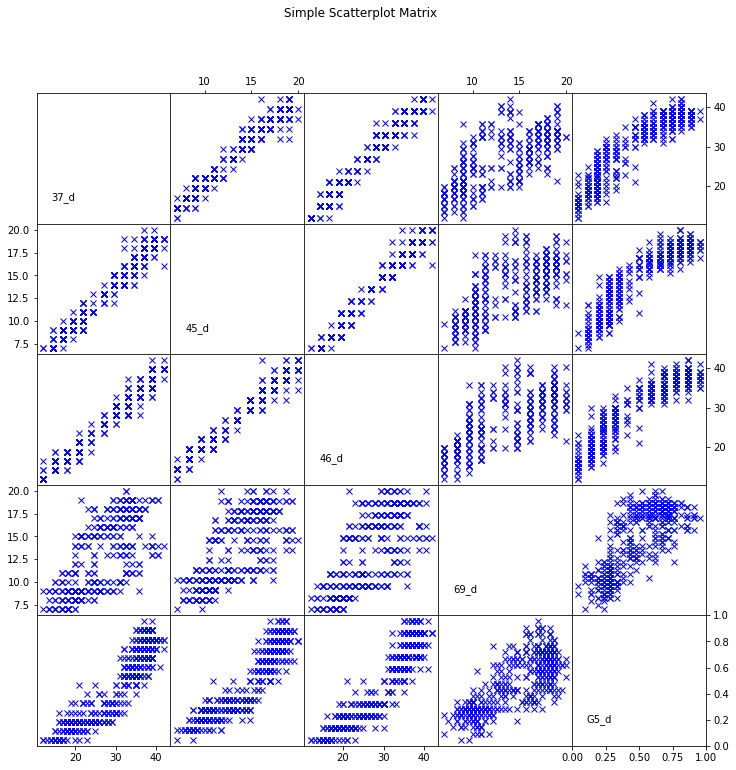

In [126]:
SUM_data = []
SUM_data.append(list(df["37_d"]))
SUM_data.append(list(df["45_d"]))
SUM_data.append(list(df["46_d"]))
SUM_data.append(list(df["69_d"]))
SUM_data.append(list(df["G5_d"]))
SUM_data = np.array(SUM_data) 
fig = scatterplot_matrix(SUM_data, ['37_d', '45_d', '46_d', '69_d', 'G5_d'], linestyle='none', marker='x', color='blue', mfc='none')
fig.suptitle('Simple Scatterplot Matrix')
plt.savefig('scatter_plot_matrix')
plt.show()

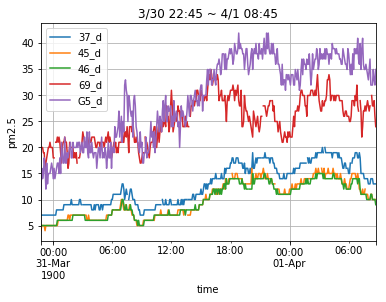

In [19]:
df = df.astype(float)
df.plot()
plt.title('3/30 22:45 ~ 4/1 08:45')
plt.grid(True)
plt.xlabel("time") 
plt.ylabel("pm2.5")
plt.savefig('all_id')
plt.show()

In [47]:
total_std = []
average = []
for x in range(0, 409):
    row = np.array(df.iloc[x])
    std = row.std()
    avg = row.mean()
    total_std.append(std)
    average.append(avg)
total_std = np.array(total_std)
average = np.array(average)
t = pd.Series(total_std)
a = pd.Series(average)
CV = total_std / average

In [48]:
# df.describe()

In [49]:
df_CV = pd.DataFrame({"CV": CV}, index = average)
plt.scatter(average, CV, marker = "o", s = 40)
plt.grid(True)
plt.title("CV and pm2.5")
plt.xlabel("pm2.5") 
plt.ylabel("CV")
plt.savefig('all_CV')
# plt.show()

r: 0.913555961461


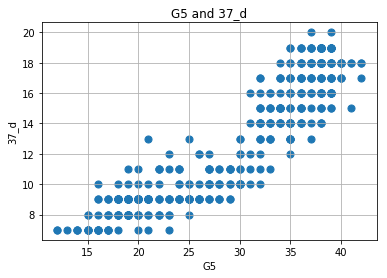

In [60]:
data_37 = df["37_d"]
G5 = df["G5_d"]
df_total = pd.DataFrame({"37_d":data_37, "G5_d":G5})
corr_coef = df_total.corr()
r = np.array(corr_coef)
print("r:", r[0][1])
plt.scatter(G5, data_37, marker = "o", s = 50)
plt.grid(True)
plt.title("G5 and 37_d")
plt.xlabel("G5") 
plt.ylabel("37_d")
# plt.savefig('G5 and 37_d')
plt.show()

r: 0.918723369715


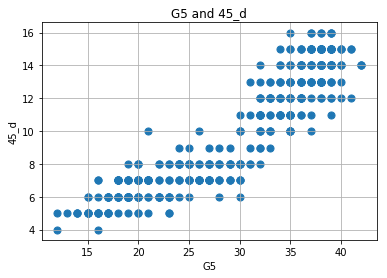

In [61]:
data_45 = df["45_d"]
G5 = df["G5_d"]
df_total = pd.DataFrame({"45_d":data_45, "G5_d":G5})
corr_coef = df_total.corr()
r = np.array(corr_coef)
print("r:", r[0][1])
plt.scatter(G5, data_45, marker = "o", s = 50)
plt.grid(True)
plt.title("G5 and 45_d")
plt.xlabel("G5") 
plt.ylabel("45_d")
# plt.savefig('G5 and 45_d')
plt.show()

r: 0.926207950848


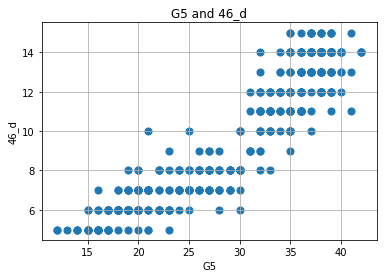

In [62]:
data_46 = df["46_d"]
G5 = df["G5_d"]
df_total = pd.DataFrame({"46_d":data_46, "G5_d":G5})
corr_coef = df_total.corr()
r = np.array(corr_coef)
print("r:", r[0][1])
plt.scatter(G5, data_46, marker = "o", s = 50)
plt.grid(True)
plt.title("G5 and 46_d")
plt.xlabel("G5") 
plt.ylabel("46_d")
# plt.savefig('G5 and 46_d')
plt.show()

r: 0.753585400894


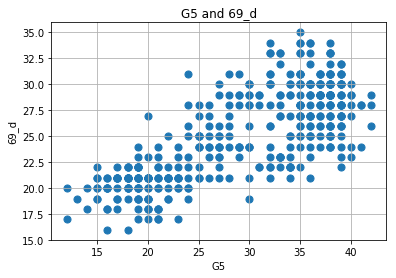

In [64]:
data_69 = df["69_d"]
G5 = df["G5_d"]
df_total = pd.DataFrame({"69_d":data_69, "G5_d":G5})
corr_coef = df_total.corr()
r = np.array(corr_coef)
print("r:", r[0][1])
plt.scatter(G5, data_69, marker = "o", s = 50)
plt.grid(True)
plt.title("G5 and 69_d")
plt.xlabel("G5") 
plt.ylabel("69_d")
# plt.savefig('G5 and 69_d')
plt.show()

In [54]:
df_MIT = pd.concat([df1, df2, df3], axis = 1) 
df_MIT = df_MIT.interpolate()
# print(df_MIT)
df_G5 = df5["G5_d"].interpolate()
# print(df_G5)
G5_list = list(df_G5)
average = []
for x in range(0, 409):
    row = np.array(df_MIT.iloc[x])
    avg = row.mean()
    # avg = avg.astype(np.int)
    average.append(avg)

In [55]:
# print(G5_list)
# print(average)

In [56]:
from sklearn.linear_model import LinearRegression

MIT_data = np.array(average)
G5_data = np.array(G5_list)

lm = LinearRegression()
lm.fit(np.reshape(MIT_data, (len(MIT_data), 1)), np.reshape(G5_data, (len(G5_data), 1)))

print(lm.coef_)
print(lm.intercept_)

[[ 2.09784787]]
[ 6.5817803]


In [101]:
to_be_predicted = np.array([6, 7, 8, 7.5])
predicted_pmdata = lm.predict(np.reshape(to_be_predicted, (len(to_be_predicted), 1)))
print(predicted_pmdata)

[[ 19.16886752]
 [ 21.26671539]
 [ 23.36456326]
 [ 22.31563932]]


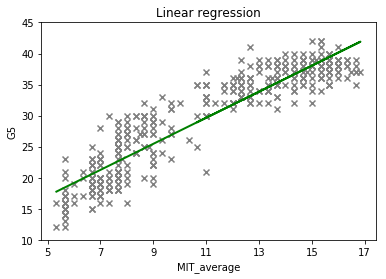

In [102]:
plt.scatter(MIT_data, G5_data, color='grey', marker = "x")
plt.plot(MIT_data, lm.predict(np.reshape(MIT_data, (len(MIT_data), 1))), color='green', linewidth=2)
# plt.plot(to_be_predicted, predicted_pmdata, color = 'blue', marker = '*', markersize = 10)
plt.xticks((np.arange(5, 18, step=2)))
plt.yticks((np.arange(10, 50, step=5)))
plt.xlabel("MIT_average") 
plt.ylabel("G5") 
plt.title("Linear regression")
# plt.savefig('linear regression_2')
plt.show()

In [127]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(MIT_data, G5_data)

In [130]:
print(slope)
print(intercept)
print(r_value)
R_square = r_value**2
print(R_square)
print(p_value)
print(std_err)

2.09784786938
6.58178030283
0.92468448744
0.855041401313
8.78725095591e-173
0.0428159126294
